In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras import models, layers

In [4]:
import os
import PIL
from PIL import ImageEnhance, ImageOps, Image

dataset_dir = r'C:\Users\HP Probook\Documents\Programming files\Python codes\ML\GTSRB'

train_dir = os.path.join(dataset_dir, 'Train')
test_dir = os.path.join(dataset_dir, 'Test')

img_height = 32
img_width = 32

In [5]:
# number of classes
num_categories = len(os.listdir(train_dir))
num_categories

43

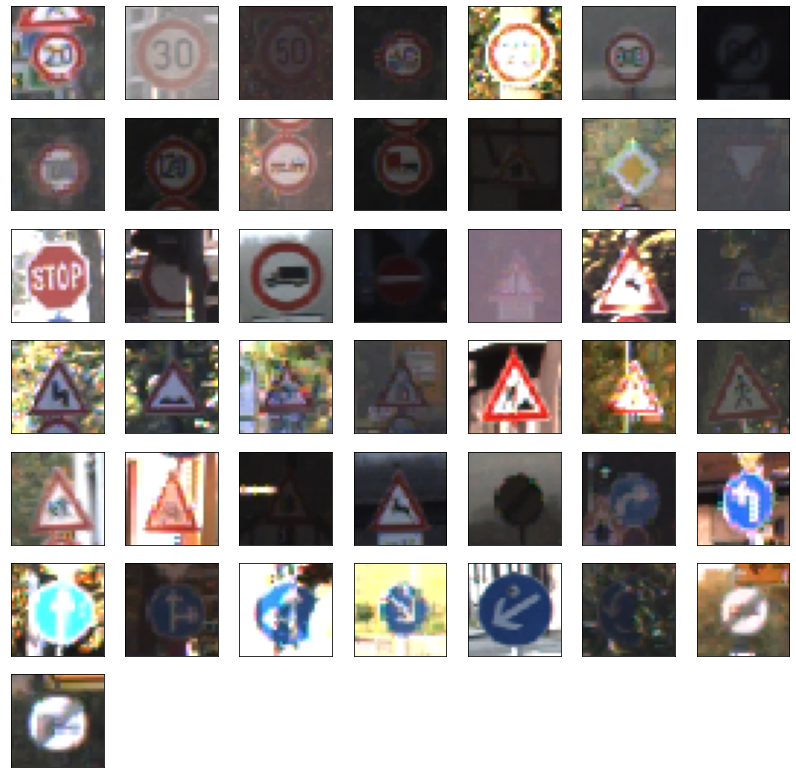

In [9]:
# visualize each of the 43 classes

import pathlib
import glob
from tensorflow.keras.preprocessing.image import load_img

img_dir = pathlib.Path(train_dir)
plt.figure(figsize=(14, 14))
index = 0

for i in range(num_categories):
    plt.subplot(7, 7, i + 1)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(img_height, img_width))
    plt.imshow(img)
    
plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import img_to_array

def load_dataset(path):
    images = []
    labels = []
    
    for category in range(num_categories):
        categories = os.path.join(path, str(category))
        
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size = (img_height,img_width))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    return images, labels

In [12]:
images, labels = load_dataset(train_dir)

In [14]:
len(labels)

39209

In [15]:
range(num_categories)

range(0, 43)

In [16]:
len(images)

39209

In [18]:
labels[-1]

42

## Image Preprocessing

In [23]:
# convert to numpy array
from tensorflow.keras.utils import to_categorical

images = np.array(images)
labels = to_categorical(labels)

In [24]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [25]:
images.shape

(39209, 32, 32, 3)

In [49]:
# let's split the dataset

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(images, labels, shuffle=True, train_size=0.8)

In [50]:
len(X_train)

31367

In [51]:
len(X_valid)

7842

In [52]:
X_train.shape

(31367, 32, 32, 3)

In [53]:
# now to clip the arrays in the range 0 - 1
X_train = X_train[:]/255.0
X_valid = X_valid[:]/255.0

In [54]:
X_train[1]

array([[[0.25882354, 0.21960784, 0.2       ],
        [0.23137255, 0.21176471, 0.20392157],
        [0.27058825, 0.26666668, 0.24705882],
        ...,
        [0.3529412 , 0.33333334, 0.29803923],
        [0.3647059 , 0.3372549 , 0.30588236],
        [0.3764706 , 0.34117648, 0.29803923]],

       [[0.25882354, 0.22352941, 0.20392157],
        [0.23137255, 0.21176471, 0.20392157],
        [0.27058825, 0.26666668, 0.2509804 ],
        ...,
        [0.3529412 , 0.3254902 , 0.29411766],
        [0.35686275, 0.32941177, 0.3019608 ],
        [0.3764706 , 0.34901962, 0.30588236]],

       [[0.2627451 , 0.23137255, 0.21176471],
        [0.23137255, 0.21176471, 0.2       ],
        [0.26666668, 0.25882354, 0.23921569],
        ...,
        [0.3647059 , 0.3254902 , 0.2901961 ],
        [0.3529412 , 0.3254902 , 0.29411766],
        [0.34509805, 0.3254902 , 0.28627452]],

       ...,

       [[0.23529412, 0.21568628, 0.1882353 ],
        [0.24313726, 0.21568628, 0.18431373],
        [0.25882354, 0

In [55]:
X_train[1].shape

(32, 32, 3)

In [56]:
# all good

## ML Models

In [57]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=X_train[1].shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_categories, activation='softmax'))

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [59]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("traffic_1.h5", save_best_only=True)

In [60]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
981/981 [==============================] - 37s 37ms/step - loss: 2.2208 - acc: 0.3521 - val_loss: 1.0467 - val_acc: 0.6682
Epoch 2/30
981/981 [==============================] - 36s 37ms/step - loss: 0.9157 - acc: 0.7018 - val_loss: 0.3983 - val_acc: 0.8880
Epoch 3/30
981/981 [==============================] - 36s 37ms/step - loss: 0.5573 - acc: 0.8168 - val_loss: 0.2413 - val_acc: 0.9375
Epoch 4/30
981/981 [==============================] - 37s 38ms/step - loss: 0.4131 - acc: 0.8653 - val_loss: 0.1518 - val_acc: 0.9593
Epoch 5/30
981/981 [==============================] - 37s 38ms/step - loss: 0.3382 - acc: 0.8898 - val_loss: 0.1098 - val_acc: 0.9707
Epoch 6/30
981/981 [==============================] - 37s 37ms/step - loss: 0.2924 - acc: 0.9038 - val_loss: 0.0879 - val_acc: 0.9801
Epoch 7/30
981/981 [==============================] - 38s 38ms/step - loss: 0.2630 - acc: 0.9156 - val_loss: 0.0844 - val_acc: 0.9769
Epoch 8/30
981/981 [==============================] - 37s 38ms

In [61]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 6, 6, 64)         

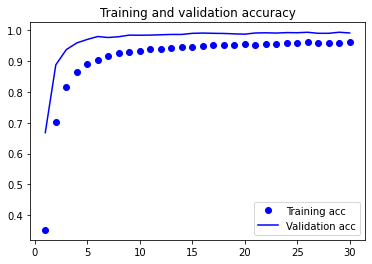

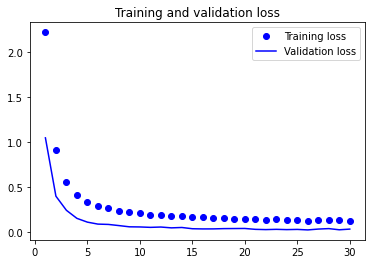

In [79]:
plt.figure()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
  
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Result: We achieved a validation accuracy of 99% on the validation set

## Evaluating on the test set

In [62]:
# first, let's define the classes for what they represent
num_categories

43

In [63]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
           18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
           36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

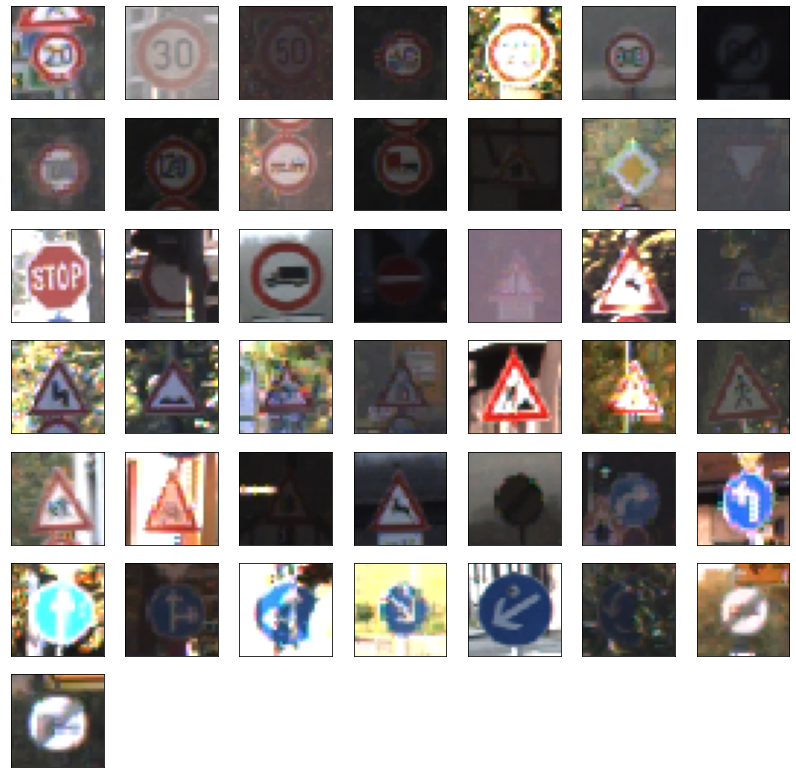

In [64]:
# let's visualize the categories again

img_dir = pathlib.Path(train_dir)
plt.figure(figsize=(14, 14))
index = 0

for i in range(num_categories):
    plt.subplot(7, 7, i + 1)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(img_height, img_width))
    plt.imshow(img)
    
plt.show()

In [69]:
# let's load the test set

test_dir = os.path.join(dataset_dir, 'Test')
images = []

for file in os.listdir(test_dir):
    img = load_img(os.path.join(test_dir, file), target_size = (img_height,img_width))
    image = img_to_array(img)
    images.append(image)

X_test = np.array(images)

In [70]:
X_test

array([[[[115., 138., 173.],
         [116., 137., 169.],
         [119., 137., 172.],
         ...,
         [ 89., 103., 130.],
         [ 86., 110., 135.],
         [ 63.,  82., 105.]],

        [[116., 143., 177.],
         [115., 140., 174.],
         [117., 141., 174.],
         ...,
         [118., 142., 176.],
         [120., 141., 173.],
         [120., 139., 171.]],

        [[118., 141., 173.],
         [117., 142., 175.],
         [113., 140., 172.],
         ...,
         [120., 144., 180.],
         [122., 144., 179.],
         [118., 142., 177.]],

        ...,

        [[117., 137., 167.],
         [114., 134., 163.],
         [118., 136., 164.],
         ...,
         [116., 139., 171.],
         [116., 136., 169.],
         [119., 140., 173.]],

        [[116., 136., 167.],
         [114., 134., 168.],
         [113., 131., 164.],
         ...,
         [112., 135., 167.],
         [117., 136., 165.],
         [114., 140., 168.]],

        [[112., 135., 168.],
       

In [71]:
X_test = X_test[:]/255.0

In [72]:
X_test

array([[[[0.4509804 , 0.5411765 , 0.6784314 ],
         [0.45490196, 0.5372549 , 0.6627451 ],
         [0.46666667, 0.5372549 , 0.6745098 ],
         ...,
         [0.34901962, 0.40392157, 0.50980395],
         [0.3372549 , 0.43137255, 0.5294118 ],
         [0.24705882, 0.32156864, 0.4117647 ]],

        [[0.45490196, 0.56078434, 0.69411767],
         [0.4509804 , 0.54901963, 0.68235296],
         [0.45882353, 0.5529412 , 0.68235296],
         ...,
         [0.4627451 , 0.5568628 , 0.6901961 ],
         [0.47058824, 0.5529412 , 0.6784314 ],
         [0.47058824, 0.54509807, 0.67058825]],

        [[0.4627451 , 0.5529412 , 0.6784314 ],
         [0.45882353, 0.5568628 , 0.6862745 ],
         [0.44313726, 0.54901963, 0.6745098 ],
         ...,
         [0.47058824, 0.5647059 , 0.7058824 ],
         [0.47843137, 0.5647059 , 0.7019608 ],
         [0.4627451 , 0.5568628 , 0.69411767]],

        ...,

        [[0.45882353, 0.5372549 , 0.654902  ],
         [0.44705883, 0.5254902 , 0.6392157 ]

In [73]:
X_test.shape

(12630, 32, 32, 3)

In [75]:
y_pred = model.predict(X_test) 
y_pred_bool = np.argmax(y_pred, axis=1)

In [78]:
y_pred_bool[0]

16

In [87]:
# let's visualize for 36 samples on the test set

y_pred_bool[:36]

array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35, 12,  7, 23,  7,  4,  9, 21,
       20, 27, 38,  4, 33,  9,  3,  1, 11, 13, 10,  9, 11,  5, 17, 34, 23,
        2, 17], dtype=int64)

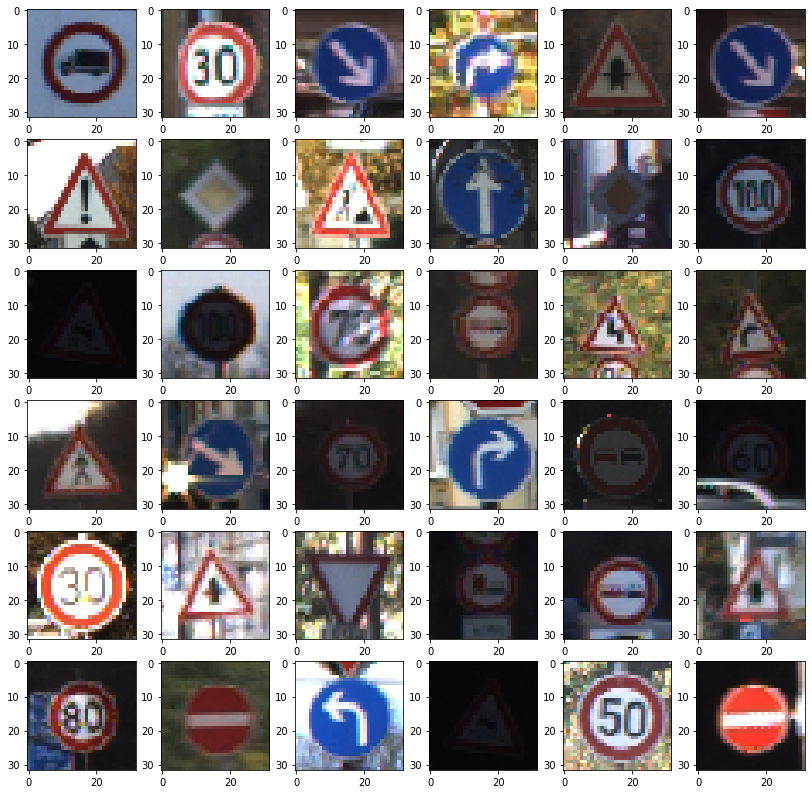

In [86]:
from matplotlib import pyplot
plt.figure(figsize=(14, 14))


for i in range(36):
    pyplot.subplot(6,6,i+1)
    pyplot.imshow(X_test[i])

A look at the above tells us that the model performs well on the test set.